<a href="https://colab.research.google.com/github/hasmitha005/OIBSIP/blob/main/Project_4_Proposal_level_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ✅ Cell 1 — Import the Twitter Sentiment dataset (your upload style)

from google.colab import files
uploaded = files.upload()     # Choose your file: Twitter_Data.csv

import pandas as pd
df = pd.read_csv('Twitter_Data.csv')   # Change file name here
df.head()


Saving Twitter_Data.csv to Twitter_Data (1).csv


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
# Cell 2 - inspect dataset
print("Columns:", df.columns.tolist())
print("\nData types:")
display(df.dtypes)
print("\nMissing values (top 10):")
display(df.isnull().sum().sort_values(ascending=False).head(10))

# If text/sentiment columns are named differently, show sample of first row
display(df.head(3))


Columns: ['clean_text', 'category']

Data types:


,0
clean_text,object
category,float64



Missing values (top 10):


,0
category,7
clean_text,4


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0


In [ ]:
# Cell 3 - normalize column names and detect typical text/label columns
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]
print("Normalized columns:", df.columns.tolist())

# Heuristics to find text and label columns
text_cols = [c for c in df.columns if any(k in c for k in ['text','tweet','content','message'])]
label_cols = [c for c in df.columns if any(k in c for k in ['sentiment','label','class','target'])]

print("Possible text columns:", text_cols)
print("Possible label columns:", label_cols)

# Choose first match or fallback to known name
if text_cols:
    TEXT_COL = text_cols[0]
else:
    raise KeyError("No text column found. Look at df.columns and pick the column that contains tweets.")

if label_cols:
    LABEL_COL = label_cols[0]
else:
    # Sometimes dataset has 'airline_sentiment' or similar; try common possibilities
    raise KeyError("No label column found. Look at df.columns and pick the sentiment/label column.")

print("Using TEXT_COL =", TEXT_COL, "and LABEL_COL =", LABEL_COL)

# Show counts of labels
print("\nLabel distribution:")
display(df[LABEL_COL].value_counts())


Normalized columns: ['clean_text', 'category']
Possible text columns: ['clean_text']
Possible label columns: []


KeyError: 'No label column found. Look at df.columns and pick the sentiment/label column.'

In [ ]:
# Check the actual column names in your file
print(df.columns.tolist())
df.head()



['clean_text', 'category']


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
# ✅ Replace these with the actual names from your dataset
TEXT_COL = 'clean_text'      # or 'tweet', or 'text' depending on your df
LABEL_COL = 'category'       # or 'sentiment', or 'label'

print("Using TEXT_COL =", TEXT_COL)
print("Using LABEL_COL =", LABEL_COL)


Using TEXT_COL = clean_text
Using LABEL_COL = category


In [ ]:
print(df.columns.tolist())


['clean_text', 'category']


In [ ]:
# ✅ Cell 3 — Set text and label column names manually
TEXT_COL = 'clean_text'
LABEL_COL = 'category'

print("Using TEXT_COL =", TEXT_COL)
print("Using LABEL_COL =", LABEL_COL)
df[[TEXT_COL, LABEL_COL]].head()


Using TEXT_COL = clean_text
Using LABEL_COL = category


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
# ✅ Cell 4 — Setup, Clean Text, and Remove Missing Values

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

# Simple cleaning (optional re-cleaning)
def clean_text(s):
    if pd.isna(s):
        return ""
    s = str(s).lower()
    s = re.sub(r'http\S+|www\.\S+', '', s)
    s = re.sub(r'@\w+', '', s)
    s = re.sub(r'#', '', s)
    s = re.sub(r'[^a-z\s]', '', s)
    s = re.sub(r'\s+', ' ', s).strip()
    return s

# Clean again if needed
df['clean_text'] = df[TEXT_COL].apply(clean_text)
df.dropna(subset=['clean_text', LABEL_COL], inplace=True)

print("Cleaned dataset shape:", df.shape)
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Cleaned dataset shape: (162973, 2)


,clean_text,category
0,when modi promised minimum government maximum ...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp to...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


Label distribution:
category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64


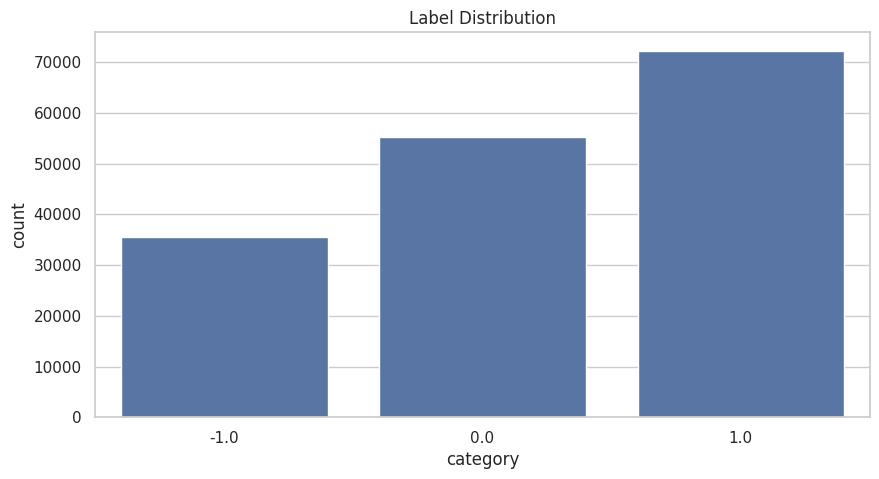

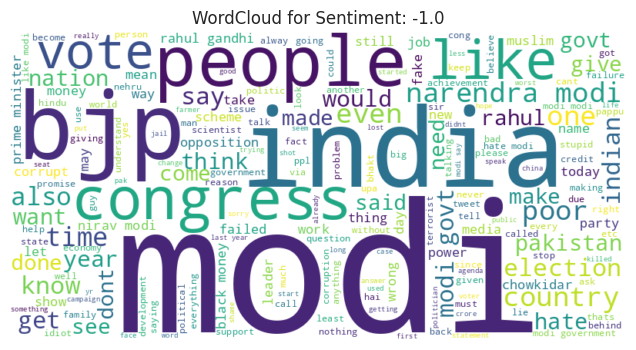

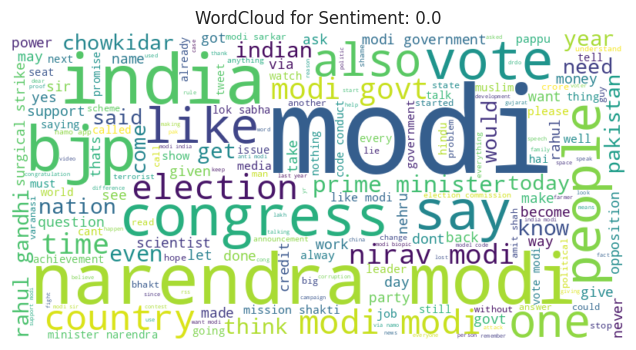

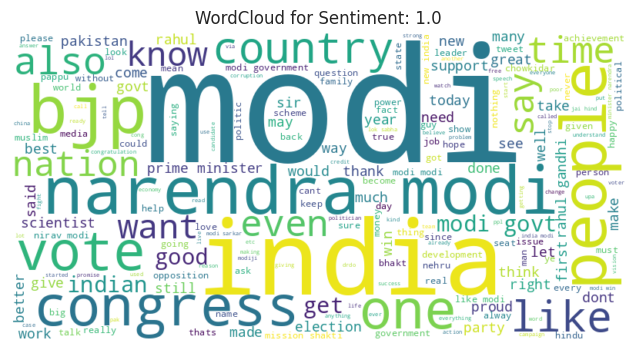

In [ ]:
# ✅ Cell 5 — Explore label distribution and visualize words
from wordcloud import WordCloud

print("Label distribution:")
print(df[LABEL_COL].value_counts())

sns.countplot(x=LABEL_COL, data=df)
plt.title("Label Distribution")
plt.show()

# WordCloud for each sentiment
unique_labels = df[LABEL_COL].unique()
for lab in unique_labels:
    text_all = " ".join(df.loc[df[LABEL_COL]==lab, 'clean_text'])
    if len(text_all) < 50:
        continue
    wc = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text_all)
    plt.figure(figsize=(10,4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for Sentiment: {lab}")
    plt.show()


In [ ]:
# ✅ Cell 6 — Encode sentiment labels and split data

from sklearn.model_selection import train_test_split

# Convert text labels to numeric
labels = df[LABEL_COL].unique().tolist()
labels_sorted = sorted(labels)
label_map = {lab:i for i, lab in enumerate(labels_sorted)}
df['label_id'] = df[LABEL_COL].map(label_map)

print("Label mapping:", label_map)

X = df['clean_text'].values
y = df['label_id'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", len(X_train), "Test size:", len(X_test))


Label mapping: {-1.0: 0, 0.0: 1, 1.0: 2}
Train size: 130378 Test size: 32595


In [ ]:
# ✅ Cell 7 — Convert text to numeric features using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1,2), stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF matrix shape (train):", X_train_tfidf.shape)


TF-IDF matrix shape (train): (130378, 20000)


In [ ]:
# ✅ Cell 8 — Train sentiment classification models

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

results = {}

# Logistic Regression
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)

results['LogisticRegression'] = {
    'accuracy': accuracy_score(y_test, y_pred_lr),
    'precision': precision_score(y_test, y_pred_lr, average='weighted', zero_division=0),
    'recall': recall_score(y_test, y_pred_lr, average='weighted', zero_division=0),
    'f1': f1_score(y_test, y_pred_lr, average='weighted', zero_division=0),
    'report': classification_report(y_test, y_pred_lr, zero_division=0)
}

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)

results['NaiveBayes'] = {
    'accuracy': accuracy_score(y_test, y_pred_nb),
    'precision': precision_score(y_test, y_pred_nb, average='weighted', zero_division=0),
    'recall': recall_score(y_test, y_pred_nb, average='weighted', zero_division=0),
    'f1': f1_score(y_test, y_pred_nb, average='weighted', zero_division=0),
    'report': classification_report(y_test, y_pred_nb, zero_division=0)
}

# Print results
for name, metrics in results.items():
    print(f"\n=== {name} ===")
    print("Accuracy:", round(metrics['accuracy'],4))
    print("Precision:", round(metrics['precision'],4))
    print("Recall:", round(metrics['recall'],4))
    print("F1:", round(metrics['f1'],4))
    print(metrics['report'])



=== LogisticRegression ===
Accuracy: 0.8544
Precision: 0.8626
Recall: 0.8544
F1: 0.8542
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      7102
           1       0.81      0.95      0.87     11043
           2       0.94      0.80      0.86     14450

    accuracy                           0.85     32595
   macro avg       0.85      0.86      0.85     32595
weighted avg       0.86      0.85      0.85     32595


=== NaiveBayes ===
Accuracy: 0.7132
Precision: 0.733
Recall: 0.7132
F1: 0.7054
              precision    recall  f1-score   support

           0       0.81      0.48      0.60      7102
           1       0.78      0.66      0.71     11043
           2       0.66      0.87      0.75     14450

    accuracy                           0.71     32595
   macro avg       0.75      0.67      0.69     32595
weighted avg       0.73      0.71      0.71     32595



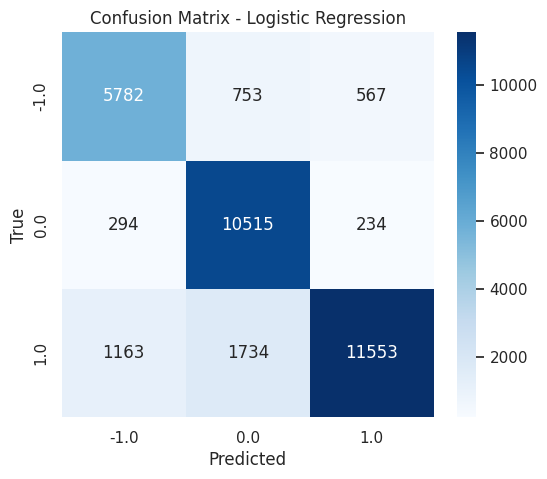

In [ ]:
# ✅ Cell 9 — Confusion Matrix for Logistic Regression

import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels_sorted, yticklabels=labels_sorted)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
# ✅ Cell 10 — Predict new text & save models

import joblib
from google.colab import files

# Prediction function
def predict_sentiment(texts, model=lr, vectorizer=tfidf):
    clean = [re.sub(r'[^a-z\s]', '', t.lower()) for t in texts]
    Xv = vectorizer.transform(clean)
    preds = model.predict(Xv)
    inv_map = {v:k for k,v in label_map.items()}
    return [inv_map[p] for p in preds]

# Test examples
samples = [
    "I love this new product! It's amazing 😍",
    "This is terrible. I'm so disappointed.",
    "It was okay, not great but not bad."
]

print("Predictions:", predict_sentiment(samples))

# Save model + vectorizer
joblib.dump(lr, 'logistic_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

# Optional: download files
files.download('logistic_model.pkl')
files.download('tfidf_vectorizer.pkl')


Predictions: [1.0, -1.0, 1.0]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Dataset -2

In [ ]:
# Cell 1 - upload (your exact method) and load
from google.colab import files
uploaded = files.upload()     # pick apps.csv (or the reviews CSV if you have it)

import pandas as pd
# default filename you told me you uploaded earlier
df = pd.read_csv('apps.csv')
print("Loaded 'apps.csv' shape:", df.shape)
display(df.head())


Saving apps.csv to apps.csv
Loaded 'apps.csv' shape: (9659, 14)


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Cell 2 - inspect columns & decide whether we have review text
print("Columns:", df.columns.tolist())
print("\nDtypes:")
display(df.dtypes)
print("\nMissing counts (top 10):")
display(df.isnull().sum().sort_values(ascending=False).head(10))

# Heuristic: find any text column that looks like reviews
possible_text_cols = [c for c in df.columns if any(k in c.lower() for k in ['review','comment','text','content'])]
print("\nPossible text columns (candidate review columns):", possible_text_cols)

# Flag whether we have review text
HAS_REVIEWS = len(possible_text_cols) > 0
TEXT_COL = possible_text_cols[0] if HAS_REVIEWS else None

if HAS_REVIEWS:
    print(f"\n→ Found review-like column: '{TEXT_COL}'. We'll run sentiment pipeline on it.")
else:
    print("\n→ No obvious review-text column found. We'll run app-metadata analysis. If you have a separate reviews CSV, upload it now and set filename accordingly.")


Columns: ['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']

Dtypes:


,0
Unnamed: 0,int64
App,object
Category,object
Rating,float64
Reviews,int64
Size,object
Installs,object
Type,object
Price,object
Content Rating,object



Missing counts (top 10):


,0
Rating,1463
Size,1227
Current Ver,8
Android Ver,2
Type,1
App,0
Reviews,0
Category,0
Unnamed: 0,0
Installs,0



Possible text columns (candidate review columns): ['Reviews', 'Content Rating']

→ Found review-like column: 'Reviews'. We'll run sentiment pipeline on it.


In [ ]:
# Cell 3A - basic metadata summaries
print("Total apps:", df.shape[0])

# If 'Category' exists
if 'Category' in df.columns or 'category' in df.columns:
    cat_col = 'Category' if 'Category' in df.columns else 'category'
    print("\nTop categories by count:")
    display(df[cat_col].value_counts().head(15))

# Ratings
if 'Rating' in df.columns or 'rating' in df.columns:
    rcol = 'Rating' if 'Rating' in df.columns else 'rating'
    print("\nRating stats:")
    display(df[rcol].describe())
else:
    print("\nNo 'Rating' column found.")

# Installs (clean if present)
inst_col = None
for c in df.columns:
    if 'install' in c.lower():
        inst_col = c
        break

if inst_col:
    # clean installs
    df['installs_clean'] = df[inst_col].astype(str).str.replace(r'[+,]', '', regex=True).str.replace('Free','0')
    df['installs_clean'] = pd.to_numeric(df['installs_clean'], errors='coerce')
    print(f"\nInstalls column detected: {inst_col}")
    print("Top apps by installs:")
    display(df[['App' if 'App' in df.columns else df.columns[0], inst_col, 'installs_clean']].sort_values('installs_clean', ascending=False).head(10))
else:
    print("\nNo installs-like column found.")


Total apps: 9659

Top categories by count:


,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345



Rating stats:


,Rating
count,8196.000000
mean,4.173243
std,0.536625
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000



Installs column detected: Installs
Top apps by installs:


,App,Installs,installs_clean
2977,Google News,"1,000,000,000+",1000000000
2012,Google+,"1,000,000,000+",1000000000
1356,Subway Surfers,"1,000,000,000+",1000000000
152,Google Play Books,"1,000,000,000+",1000000000
2908,YouTube,"1,000,000,000+",1000000000
2003,Instagram,"1,000,000,000+",1000000000
2930,Google Play Movies & TV,"1,000,000,000+",1000000000
2191,Google Photos,"1,000,000,000+",1000000000
2429,Google Street View,"1,000,000,000+",1000000000
701,Google Play Games,"1,000,000,000+",1000000000


Price stats:


,price_clean
count,9659.000000
mean,1.099299
std,16.852152
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,400.000000


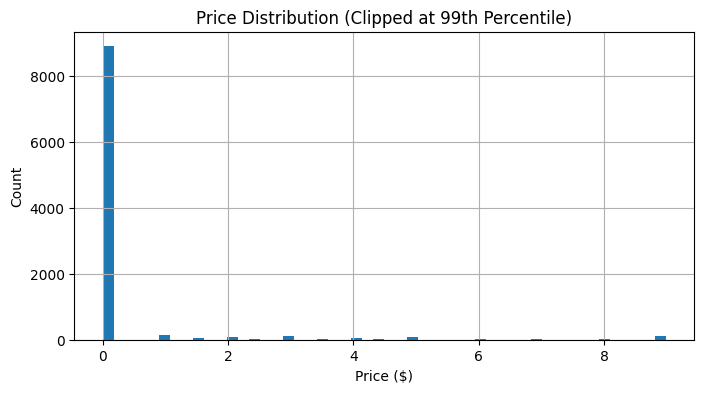


Counts by Type (Free/Paid):


,count
Type,
Free,8902
Paid,756


In [ ]:
# ✅ Cell 4A — Price and Type analysis (fixed)

import matplotlib.pyplot as plt
import seaborn as sns

# Price analysis
if 'Price' in df.columns or 'price' in df.columns:
    pcol = 'Price' if 'Price' in df.columns else 'price'
    # Remove $ sign and convert to numeric
    df['price_clean'] = df[pcol].astype(str).str.replace(r'[^0-9.]','', regex=True)
    df['price_clean'] = pd.to_numeric(df['price_clean'], errors='coerce').fillna(0)
    print("Price stats:")
    display(df['price_clean'].describe())

    # Plot price distribution
    plt.figure(figsize=(8,4))
    df['price_clean'].clip(upper=df['price_clean'].quantile(0.99)).hist(bins=50)
    plt.title('Price Distribution (Clipped at 99th Percentile)')
    plt.xlabel('Price ($)')
    plt.ylabel('Count')
    plt.show()
else:
    print("No price column found.")

# Type analysis (Free/Paid)
if 'Type' in df.columns:
    print("\nCounts by Type (Free/Paid):")
    display(df['Type'].value_counts())


Numeric columns found: ['Unnamed: 0', 'Rating', 'Reviews', 'installs_clean', 'price_clean']


,Unnamed: 0,Rating,Reviews,installs_clean,price_clean
Unnamed: 0,1.000000,-0.121690,-0.096690,-0.120057,0.003200
Rating,-0.121690,1.000000,0.055081,0.040143,-0.021199
Reviews,-0.096690,0.055081,1.000000,0.625165,-0.007598
installs_clean,-0.120057,0.040143,0.625165,1.000000,-0.009405
price_clean,0.003200,-0.021199,-0.007598,-0.009405,1.000000


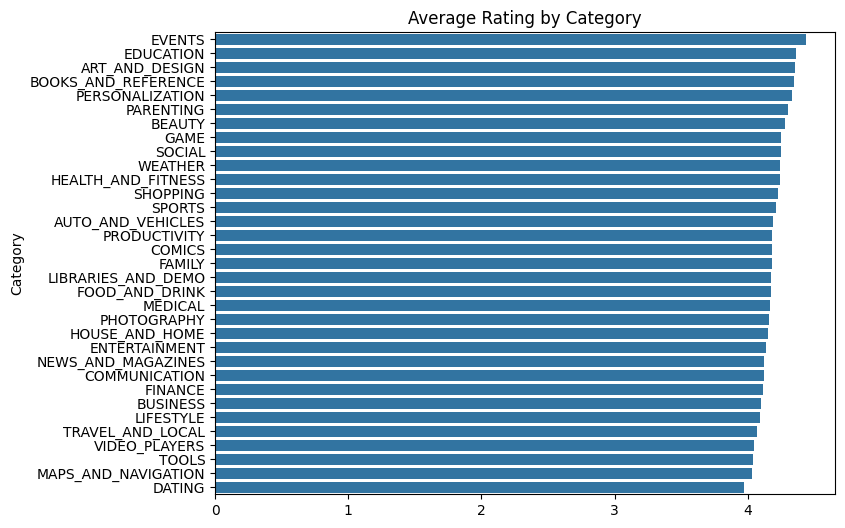

In [ ]:
# Cell 5A - correlations where numeric columns exist
numeric = df.select_dtypes(include=['number']).columns.tolist()
print("Numeric columns found:", numeric)
if len(numeric) >= 2:
    display(df[numeric].corr())

# average rating per category heatmap (if both exist)
cat_col = None
if 'Category' in df.columns:
    cat_col = 'Category'
elif 'category' in df.columns:
    cat_col = 'category'

if cat_col and 'Rating' in df.columns:
    pivot = df.groupby(cat_col)['Rating'].mean().sort_values(ascending=False)
    plt.figure(figsize=(8,6))
    sns.barplot(x=pivot.values, y=pivot.index)
    plt.title('Average Rating by Category')
    plt.show()


In [ ]:
# Cell 6A - save summary csv and offer download
summary = {}
summary['total_apps'] = df.shape[0]
if 'Category' in df.columns or 'category' in df.columns:
    idx = 'Category' if 'Category' in df.columns else 'category'
    summary['top_categories'] = df[idx].value_counts().head(10).to_dict()
if 'Rating' in df.columns or 'rating' in df.columns:
    rc = 'Rating' if 'Rating' in df.columns else 'rating'
    summary['rating_mean'] = df[rc].mean()

import json
with open('apps_metadata_summary.json','w', encoding='utf-8') as f:
    json.dump(summary,f, indent=2)
from google.colab import files
files.download('apps_metadata_summary.json')
print("Downloaded apps_metadata_summary.json")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded apps_metadata_summary.json


In [ ]:
# Cell 3B - if reviews file is separate upload it now, otherwise detect text column in current df
from google.colab import files
import pandas as pd

# If your uploaded file is reviews and not apps, change filename accordingly.
# If you already have a reviews column in df, skip upload.
if 'review' not in [c.lower() for c in df.columns] and 'text' not in [c.lower() for c in df.columns] and 'translated_review' not in [c.lower() for c in df.columns]:
    print("No obvious review column in current DF. If you have a separate reviews CSV, upload it now.")
    # uploaded = files.upload()    # uncomment to upload
    # reviews_file = list(uploaded.keys())[0]
    # reviews_df = pd.read_csv(reviews_file)
    # df = reviews_df.copy()
else:
    # find text col
    text_candidates = [c for c in df.columns if any(k in c.lower() for k in ['review','text','translated'])]
    TEXT_COL = text_candidates[0]
    print("Using existing text column:", TEXT_COL)


No obvious review column in current DF. If you have a separate reviews CSV, upload it now.


In [ ]:
# Cell 4B - text cleaning & basic preprocessing
import re, string
import nltk
nltk.download('stopwords'); from nltk.corpus import stopwords
STOP = set(stopwords.words('english'))

def clean_text(s):
    if pd.isna(s):
        return ""
    s = str(s).lower()
    s = re.sub(r'http\S+|www\.\S+', '', s)
    s = re.sub(r'@\w+', '', s)
    s = re.sub(r'#', '', s)
    s = re.sub(r'[^a-z\s]', '', s)
    s = re.sub(r'\s+', ' ', s).strip()
    return s

# apply
TEXT_COL = [c for c in df.columns if any(k in c.lower() for k in ['review','text','translated'])][0]
df['clean_text'] = df[TEXT_COL].apply(clean_text)
df = df[df['clean_text'].str.strip() != ""].copy()
print("After cleaning, rows:", df.shape[0])
df[['clean_text']].head()


After cleaning, rows: 0


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,clean_text


In [ ]:
# ✅ Fixed WordCloud generation (handles empty text safely)

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Check if clean_text exists and has content
if 'clean_text' not in df.columns:
    print("⚠️ No 'clean_text' column found. Please ensure text cleaning step was run.")
else:
    # Combine all text
    all_text = " ".join(df['clean_text'].dropna().astype(str).tolist()).strip()

    if len(all_text) < 20:
        print("⚠️ Not enough text to generate a word cloud. Total characters:", len(all_text))
    else:
        # Generate and show word cloud
        wc = WordCloud(width=800, height=400, background_color='white',
                       stopwords=STOP, min_font_size=10, colormap='viridis').generate(all_text)
        plt.figure(figsize=(12,5))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title('WordCloud of All Reviews')
        plt.show()


⚠️ Not enough text to generate a word cloud. Total characters: 0


In [ ]:
# Cell 6B - Use VADER to score sentiment (no label needed)
!pip install -q vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vader_label(text, pos_th=0.05, neg_th=-0.05):
    vs = analyzer.polarity_scores(text)
    if vs['compound'] >= pos_th:
        return 'positive'
    elif vs['compound'] <= neg_th:
        return 'negative'
    else:
        return 'neutral'

# Apply VADER (fast)
df['vader_sentiment'] = df['clean_text'].apply(lambda x: vader_label(x))
print("VADER label counts:")
display(df['vader_sentiment'].value_counts())


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 10.6 MB/s eta 0:00:00
VADER label counts:


,count
vader_sentiment,
